In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [130]:
df = pd.read_csv('問卷調查_編碼過1_後半.csv',encoding='utf_8_sig')
df.shape

(235, 24)

In [131]:
df.head()

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?
0,3,1,0,1,0,0,0,5,5,3,4,5,5,5,5,5,3,4,5,5,5,5,3,1
1,3,1,0,0,0,1,0,5,5,5,5,3,5,2,2,3,5,5,5,5,5,5,5,1
2,5,1,0,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,0
3,3,1,1,0,0,0,0,3,4,5,5,5,5,4,4,2,3,3,5,4,3,2,2,1
4,3,0,0,0,1,0,0,5,5,5,5,5,4,5,5,5,4,5,5,5,5,5,3,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   年齡                                     235 non-null    int64
 1   性別                                     235 non-null    int64
 2   如何挑選化妝品(直接至開價或專櫃詢問)                    235 non-null    int64
 3   如何挑選化妝品(聽取朋友建議)                        235 non-null    int64
 4   如何挑選化妝品(到網路上爬文)                        235 non-null    int64
 5   如何挑選化妝品(看美妝YouTuber)                   235 non-null    int64
 6   如何挑選化妝品(不做任何參考)                        235 non-null    int64
 7   吸引點擊觀看 [封面好看]                          235 non-null    int64
 8   吸引點擊觀看[醒目簡潔有力]                         235 non-null    int64
 9   吸引點擊觀看 [包含目標產品]                        235 non-null    int64
 10  吸引點擊觀看 [包含產品功能]                        235 non-null    int64
 11  美妝YouTuber的介紹影片最重視? [實用性]       

In [133]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-06-22 18:27:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.215.101, 173.194.215.102, 173.194.215.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ta9kqsvgsm1r5cr44rtscg48ac3erjm/1624386375000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-06-22 18:27:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ta9kqsvgsm1r5cr44rtscg48ac3erjm/1624386375000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [134]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss #標準化

X = df #標準化
sc = ss()
X = sc.fit_transform(X)

kms = KMeans(n_clusters=9, random_state=42) 
y_pred = kms.fit_predict(X)
print(kms.cluster_centers_)

[[ 1.04245361e-01 -1.42385594e-01 -3.60288346e-01 -4.73242362e-01
  -1.04795720e+00  2.20794022e+00 -9.26482109e-02  1.33618594e-01
   7.63987461e-02  3.45552476e-01  4.08885246e-01  2.39003545e-01
   4.35598330e-01  1.52911624e-01  3.70499895e-01  4.81035756e-01
   4.72470916e-01  4.40539713e-01  3.94981289e-01  3.94898093e-01
   2.21304050e-01  2.45413751e-01  5.81510181e-01  3.77690985e-01]
 [ 2.23636850e+00  2.59371356e-01 -3.60288346e-01 -4.73242362e-01
  -1.04795720e+00 -4.52910814e-01  1.07935166e+01 -7.76537044e-01
  -9.26092415e-01 -1.00224556e+00  8.75661443e-03 -2.08400259e+00
  -1.21355990e+00 -3.88524062e-01 -1.34632356e+00 -3.30037985e-01
   1.51358870e-01 -1.29165507e-01 -1.94866184e+00 -4.41685761e-01
   2.50504753e-01  5.91713525e-01  7.38768507e-02 -4.87631676e-01]
 [ 1.74398517e-01 -1.41214291e-01 -3.60288346e-01 -3.67678095e-01
   8.72515217e-01 -4.52910814e-01 -9.26482109e-02  6.44420227e-01
   5.69274734e-01  1.11750775e-01  1.34744638e-01  3.35768408e-01
   1.927

In [135]:
kms.labels_

array([7, 0, 1, 6, 2, 7, 2, 4, 7, 8, 6, 0, 2, 5, 4, 4, 4, 7, 2, 4, 8, 5,
       2, 4, 6, 0, 3, 2, 0, 5, 2, 4, 3, 8, 3, 7, 4, 2, 4, 8, 3, 2, 2, 4,
       7, 3, 5, 8, 2, 8, 3, 4, 2, 3, 7, 0, 8, 8, 8, 2, 8, 2, 0, 6, 2, 0,
       0, 8, 3, 3, 4, 2, 8, 8, 7, 2, 8, 6, 7, 3, 2, 2, 2, 3, 2, 6, 0, 2,
       6, 2, 2, 5, 0, 2, 3, 2, 6, 8, 4, 2, 2, 2, 0, 6, 0, 8, 4, 4, 7, 4,
       2, 2, 5, 4, 0, 0, 0, 0, 8, 5, 3, 8, 8, 0, 0, 3, 5, 8, 3, 0, 7, 2,
       2, 4, 7, 3, 4, 5, 0, 6, 2, 2, 2, 0, 4, 0, 4, 5, 6, 7, 8, 4, 6, 0,
       2, 0, 8, 6, 4, 3, 0, 3, 3, 0, 0, 4, 2, 0, 3, 6, 8, 0, 3, 2, 2, 3,
       0, 4, 2, 4, 4, 3, 0, 4, 2, 3, 0, 8, 1, 3, 5, 6, 7, 7, 8, 4, 4, 2,
       6, 8, 4, 5, 3, 6, 6, 4, 0, 2, 7, 5, 6, 0, 4, 2, 5, 6, 0, 4, 4, 3,
       2, 3, 6, 7, 6, 8, 0, 2, 6, 2, 2, 6, 3, 3, 8], dtype=int32)

Text(0, 0.5, '集群內的誤差平方和')

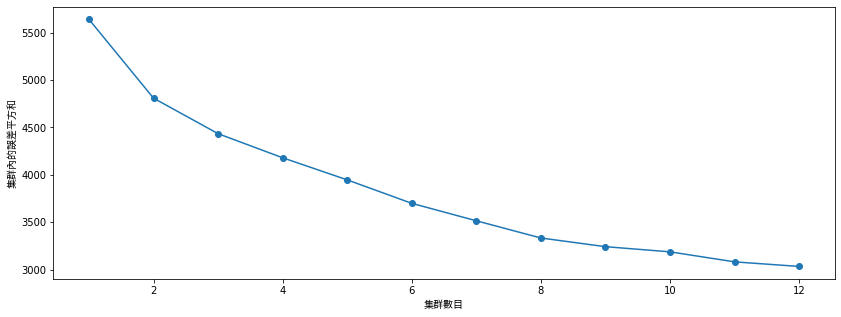

In [136]:
errors = []
for i in range(1,13):
    kms1 = KMeans(n_clusters=i)
    kms1.fit(X)
    errors.append(kms1.inertia_) #.inertia_存放「集群內的誤差平方和」。

plt.figure(figsize=(14, 5))
plt.plot(list(range(1,13)), errors, marker='o')
# plt.xlabel('集群數目', fontproperties=myfont)
# plt.ylabel('集群內的誤差平方和', fontproperties=myfont)
plt.xlabel('集群數目', fontproperties=myfont)
plt.ylabel('集群內的誤差平方和', fontproperties=myfont)

In [137]:
four_cluster_df = df.copy(deep=True)

four_cluster_df['Cluster'] = kms.labels_
four_cluster_df.head()

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
0,3,1,0,1,0,0,0,5,5,3,4,5,5,5,5,5,3,4,5,5,5,5,3,1,7
1,3,1,0,0,0,1,0,5,5,5,5,3,5,2,2,3,5,5,5,5,5,5,5,1,0
2,5,1,0,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,0,1
3,3,1,1,0,0,0,0,3,4,5,5,5,5,4,4,2,3,3,5,4,3,2,2,1,6
4,3,0,0,0,1,0,0,5,5,5,5,5,4,5,5,5,4,5,5,5,5,5,3,1,2


In [138]:
four_cluster_df.groupby('Cluster').count()

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
3,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
4,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
5,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
6,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
7,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
8,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [139]:
df1 = four_cluster_df[four_cluster_df['Cluster']==1]
df1

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
2,5,1,0,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,0,1
188,4,0,0,0,0,0,1,2,3,3,5,2,3,3,2,3,3,3,2,4,5,3,3,1,1


In [140]:
df0 = four_cluster_df[four_cluster_df['Cluster']==0]
df0

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
1,3,1,0,0,0,1,0,5,5,5,5,3,5,2,2,3,5,5,5,5,5,5,5,1,0
11,3,0,0,0,0,1,0,5,5,3,3,5,5,3,5,3,3,4,5,4,4,3,3,0,0
25,3,1,0,0,0,1,0,5,4,4,3,4,5,3,3,2,5,5,5,2,3,5,5,1,0
28,3,0,0,0,0,1,0,3,5,5,5,4,5,3,5,3,4,3,4,3,3,2,2,0,0
55,4,1,0,0,0,1,0,3,4,5,5,5,4,4,5,5,3,3,5,5,5,5,3,1,0
62,3,0,0,0,0,1,0,3,4,4,4,4,5,2,5,4,4,4,3,4,3,3,4,1,0
65,4,1,0,0,0,1,0,4,4,4,4,4,5,4,4,5,3,3,5,5,3,5,3,1,0
66,3,0,0,0,0,1,0,3,2,5,4,5,5,4,4,4,4,3,5,3,2,1,4,1,0
86,3,0,0,0,0,1,0,4,3,4,4,5,5,3,4,4,3,4,5,5,5,4,3,1,0
92,3,0,0,0,0,1,0,2,4,5,5,4,5,4,5,5,2,4,4,5,5,3,4,1,0


In [141]:
df1 = four_cluster_df[four_cluster_df['Cluster']==1]
df1

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
2,5,1,0,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,0,1
188,4,0,0,0,0,0,1,2,3,3,5,2,3,3,2,3,3,3,2,4,5,3,3,1,1


In [142]:
df2 = four_cluster_df[four_cluster_df['Cluster']==2]
df2

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
4,3,0,0,0,1,0,0,5,5,5,5,5,4,5,5,5,4,5,5,5,5,5,3,1,2
6,3,0,0,0,1,0,0,4,4,4,5,4,4,4,4,5,3,3,5,5,3,4,3,1,2
12,3,1,0,0,1,0,0,4,5,5,4,5,4,5,5,4,3,4,5,5,4,3,4,1,2
18,3,1,0,0,1,0,0,3,3,4,5,5,5,4,5,5,4,3,5,5,5,3,4,1,2
22,3,0,0,0,1,0,0,3,5,4,4,5,4,3,4,3,4,4,5,4,4,3,3,1,2
27,3,0,0,0,1,0,0,3,4,4,5,5,5,4,4,3,4,3,5,5,4,3,3,1,2
30,3,0,0,0,1,0,0,4,4,4,4,5,5,4,4,4,4,4,5,5,4,4,4,1,2
37,4,1,0,0,1,0,0,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,1,2
41,3,0,0,0,1,0,0,4,4,5,5,5,3,3,5,4,3,3,5,5,3,4,3,1,2
42,3,0,0,0,1,0,0,5,4,4,4,5,4,3,3,5,3,4,4,4,4,5,3,1,2


In [143]:
df3 = four_cluster_df[four_cluster_df['Cluster']==3]
df3

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
26,3,0,0,0,1,0,0,5,5,5,5,5,3,3,4,2,2,1,5,4,3,2,1,0,3
32,3,0,0,0,1,0,0,3,4,5,5,5,5,4,5,3,4,4,4,3,3,3,4,1,3
34,3,0,0,0,1,0,0,3,5,5,5,5,5,2,5,1,4,4,5,3,2,1,1,1,3
40,3,0,0,0,1,0,0,2,3,5,5,5,5,3,4,4,2,4,5,3,3,3,3,1,3
45,3,0,0,0,1,0,0,2,2,5,5,5,5,2,5,3,2,5,5,3,2,4,2,1,3
50,4,0,0,0,1,0,0,1,4,5,5,5,5,3,4,3,3,3,4,3,3,3,3,1,3
53,3,0,0,0,1,0,0,3,4,5,5,5,5,2,5,1,1,1,5,3,3,4,2,1,3
68,3,0,0,0,1,0,0,4,4,5,5,5,5,4,4,3,2,2,5,4,3,3,2,1,3
69,3,0,0,0,1,0,0,3,2,5,4,5,4,3,3,3,3,3,5,5,4,3,3,1,3
79,3,0,0,0,1,0,0,3,4,4,5,5,4,4,4,3,3,3,4,4,4,3,3,1,3


In [144]:
df4 = four_cluster_df[four_cluster_df['Cluster']==4]
df4

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
7,3,1,0,0,1,0,0,2,2,3,4,4,4,2,3,1,3,3,4,3,2,2,3,1,4
14,3,0,0,0,1,0,0,3,4,4,4,4,4,2,4,3,2,3,4,4,3,3,2,0,4
15,3,1,0,0,1,0,0,1,2,4,3,5,4,2,5,3,1,2,3,3,3,3,3,0,4
16,3,0,0,0,1,0,0,3,3,2,2,3,2,1,1,3,1,2,4,4,4,4,2,1,4
19,3,0,0,0,1,0,0,2,2,5,5,5,4,3,2,1,1,1,4,3,2,3,2,1,4
23,3,0,0,0,1,0,0,3,4,4,4,5,3,3,3,3,3,2,5,3,3,3,3,1,4
31,4,0,0,0,1,0,0,2,4,3,4,4,4,2,4,2,4,2,3,4,4,3,3,1,4
36,3,1,0,0,1,0,0,2,3,4,4,4,4,2,3,3,2,2,4,3,3,4,2,1,4
38,4,1,0,0,1,0,0,4,5,3,4,3,3,3,3,3,3,3,3,3,3,3,3,1,4
43,4,0,0,0,1,0,0,3,4,3,4,4,3,2,3,1,1,3,4,2,2,2,2,1,4


In [145]:
df5 = four_cluster_df[four_cluster_df['Cluster']==5]
df5

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
13,3,0,0,0,1,0,0,4,3,1,2,1,1,3,2,4,2,4,1,2,3,2,3,1,5
21,3,1,0,0,1,0,0,1,2,3,4,1,2,3,2,1,2,3,1,2,1,2,1,0,5
29,3,1,0,1,0,0,0,2,2,2,2,1,1,2,1,1,1,1,1,1,3,3,1,0,5
46,3,0,1,0,0,0,0,2,3,3,2,3,2,3,2,3,2,2,2,2,3,3,2,0,5
91,4,0,0,0,1,0,0,3,2,1,1,1,1,2,2,1,3,2,1,2,2,2,2,1,5
112,3,1,0,1,0,0,0,4,4,3,2,3,3,3,3,2,2,3,3,2,3,3,3,0,5
119,3,0,0,0,1,0,0,3,4,2,1,2,1,5,3,4,5,5,1,2,4,3,5,1,5
126,3,1,0,0,1,0,0,2,3,2,3,2,2,3,3,2,3,3,3,3,2,3,3,0,5
137,1,1,1,0,0,0,0,2,3,3,3,3,2,2,2,2,3,3,3,2,2,2,2,1,5
147,3,1,1,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,0,5


In [146]:
df6 = four_cluster_df[four_cluster_df['Cluster']==6]
df6

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
3,3,1,1,0,0,0,0,3,4,5,5,5,5,4,4,2,3,3,5,4,3,2,2,1,6
10,5,1,1,0,0,0,0,4,4,4,2,4,3,4,4,2,1,1,5,5,5,4,3,0,6
24,3,1,1,0,0,0,0,2,5,5,4,5,5,3,4,1,1,1,5,5,4,3,1,1,6
63,3,0,1,0,0,0,0,3,5,5,4,5,5,2,5,3,1,3,5,5,3,3,1,0,6
77,3,0,1,0,0,0,0,3,3,3,3,4,4,4,4,3,2,2,4,4,4,2,2,1,6
85,1,1,1,0,0,0,0,3,5,5,5,5,5,3,4,5,2,5,5,3,4,5,5,0,6
88,2,0,1,0,0,0,0,1,5,5,5,5,5,3,5,4,5,3,5,4,3,3,5,0,6
96,3,0,1,0,0,0,0,2,4,4,4,5,5,3,4,3,1,1,5,4,5,3,2,1,6
103,2,1,1,0,0,0,0,4,4,4,4,5,5,5,3,3,3,5,5,4,5,4,4,0,6
139,3,1,1,0,0,0,0,2,4,3,4,5,4,3,5,2,3,3,5,4,3,3,3,0,6


In [147]:
df7 = four_cluster_df[four_cluster_df['Cluster']==7]
df7

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
0,3,1,0,1,0,0,0,5,5,3,4,5,5,5,5,5,3,4,5,5,5,5,3,1,7
5,3,1,0,1,0,0,0,5,5,5,5,5,5,5,1,5,1,2,5,5,5,5,2,0,7
8,3,0,0,0,1,0,0,4,4,5,5,5,5,5,5,4,2,3,3,5,4,3,2,1,7
17,3,1,0,1,0,0,0,3,4,5,3,4,5,5,3,3,2,2,5,5,5,5,3,1,7
35,4,1,0,0,1,0,0,5,5,5,5,5,5,5,5,5,2,3,5,5,5,5,3,1,7
44,3,1,0,1,0,0,0,4,5,5,5,4,5,4,4,3,2,4,5,5,5,2,2,1,7
54,4,1,0,0,1,0,0,4,5,5,5,5,5,3,5,5,1,2,5,5,3,2,1,1,7
74,3,0,0,0,1,0,0,3,5,5,4,5,4,5,4,5,2,2,4,4,5,2,2,0,7
78,3,1,0,0,1,0,0,4,5,5,5,5,5,4,5,5,3,3,5,5,5,4,3,1,7
108,3,0,0,0,1,0,0,3,4,5,5,4,4,4,5,5,1,2,4,5,5,3,2,0,7


In [148]:
df8 = four_cluster_df[four_cluster_df['Cluster']==8]
df8

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
9,5,0,0,1,0,0,0,4,5,5,4,4,5,2,4,4,5,5,5,4,3,4,4,1,8
20,3,0,0,1,0,0,0,3,5,4,4,4,4,4,5,4,3,4,5,3,4,4,3,0,8
33,4,1,0,1,0,0,0,3,3,3,3,3,3,3,4,3,4,4,3,4,5,5,5,1,8
39,3,1,0,1,0,0,0,2,4,4,3,3,4,3,3,3,4,4,3,4,4,2,3,0,8
47,3,0,0,1,0,0,0,3,3,4,4,4,3,3,4,4,3,2,4,3,3,3,3,0,8
49,3,1,0,1,0,0,0,3,3,5,5,5,5,3,2,4,4,3,5,4,4,4,3,1,8
56,4,0,0,1,0,0,0,4,4,4,4,3,3,3,3,3,3,3,4,3,3,4,3,0,8
57,3,0,0,1,0,0,0,4,4,4,4,4,4,4,4,3,3,3,4,4,4,3,3,0,8
58,3,0,0,1,0,0,0,4,4,4,4,4,4,4,4,3,3,3,4,4,4,3,3,0,8
60,3,1,0,1,0,0,0,4,4,4,3,4,4,3,4,4,3,3,5,5,3,4,3,1,8


In [149]:
df0.mean(axis=0).round(2)

年齡                                       3.14
性別                                       0.31
如何挑選化妝品(直接至開價或專櫃詢問)                      0.00
如何挑選化妝品(聽取朋友建議)                          0.00
如何挑選化妝品(到網路上爬文)                          0.00
如何挑選化妝品(看美妝YouTuber)                     1.00
如何挑選化妝品(不做任何參考)                          0.00
吸引點擊觀看 [封面好看]                            3.50
吸引點擊觀看[醒目簡潔有力]                           3.92
吸引點擊觀看 [包含目標產品]                          4.33
吸引點擊觀看 [包含產品功能]                          4.39
美妝YouTuber的介紹影片最重視? [實用性]                4.53
美妝YouTuber的介紹影片最重視? [專業性]                4.56
美妝YouTuber的介紹影片最重視?[有趣程度]                3.53
美妝YouTuber的介紹影片最重視? [節奏恰當不冗長]            4.25
美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度]    3.89
美妝YouTuber的介紹影片最重視? [觀看人數]               3.36
美妝YouTuber的介紹影片最重視? [影片留言之評價]            3.69
美妝YouTuber的個人特質最重視?[介紹專業度]               4.61
美妝YouTuber的個人特質最重視?[個人個性風格]              4.28
美妝YouTuber的個人特質最重視?[講話有趣程度]              3.97
美妝YouTuber的個人特質最重視? [長相]          

In [150]:
df0.loc['平均'] = df0.mean(axis=0).round(2)
df0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
1,3.00,1.00,0.0,0.0,0.0,1.0,0.0,5.0,5.00,5.00,5.00,3.00,5.00,2.00,2.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0.0
11,3.00,0.00,0.0,0.0,0.0,1.0,0.0,5.0,5.00,3.00,3.00,5.00,5.00,3.00,5.00,3.00,3.00,4.00,5.00,4.00,4.00,3.00,3.00,0.00,0.0
25,3.00,1.00,0.0,0.0,0.0,1.0,0.0,5.0,4.00,4.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,5.00,5.00,2.00,3.00,5.00,5.00,1.00,0.0
28,3.00,0.00,0.0,0.0,0.0,1.0,0.0,3.0,5.00,5.00,5.00,4.00,5.00,3.00,5.00,3.00,4.00,3.00,4.00,3.00,3.00,2.00,2.00,0.00,0.0
55,4.00,1.00,0.0,0.0,0.0,1.0,0.0,3.0,4.00,5.00,5.00,5.00,4.00,4.00,5.00,5.00,3.00,3.00,5.00,5.00,5.00,5.00,3.00,1.00,0.0
62,3.00,0.00,0.0,0.0,0.0,1.0,0.0,3.0,4.00,4.00,4.00,4.00,5.00,2.00,5.00,4.00,4.00,4.00,3.00,4.00,3.00,3.00,4.00,1.00,0.0
65,4.00,1.00,0.0,0.0,0.0,1.0,0.0,4.0,4.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,3.00,3.00,5.00,5.00,3.00,5.00,3.00,1.00,0.0
66,3.00,0.00,0.0,0.0,0.0,1.0,0.0,3.0,2.00,5.00,4.00,5.00,5.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,2.00,1.00,4.00,1.00,0.0
86,3.00,0.00,0.0,0.0,0.0,1.0,0.0,4.0,3.00,4.00,4.00,5.00,5.00,3.00,4.00,4.00,3.00,4.00,5.00,5.00,5.00,4.00,3.00,1.00,0.0
92,3.00,0.00,0.0,0.0,0.0,1.0,0.0,2.0,4.00,5.00,5.00,4.00,5.00,4.00,5.00,5.00,2.00,4.00,4.00,5.00,5.00,3.00,4.00,1.00,0.0


In [151]:
df1.mean(axis=0).round(2)
df1.loc['平均'] = df1.mean(axis=0).round(2)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
2,5.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,0.0,1.0
188,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,5.0,3.0,3.0,1.0,1.0
平均,4.5,0.5,0.0,0.0,0.0,0.0,1.0,2.5,3.0,3.0,4.0,2.5,3.0,3.0,2.5,3.0,3.0,3.0,2.5,3.5,4.0,4.0,3.0,0.5,1.0


In [152]:
df2.mean(axis=0).round(2)
df2.loc['平均'] = df2.mean(axis=0).round(2)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
4,3.00,0.00,0.0,0.00,1.00,0.0,0.0,5.00,5.00,5.0,5.00,5.00,4.00,5.00,5.00,5.0,4.00,5.00,5.00,5.00,5.00,5.00,3.00,1.00,2.0
6,3.00,0.00,0.0,0.00,1.00,0.0,0.0,4.00,4.00,4.0,5.00,4.00,4.00,4.00,4.00,5.0,3.00,3.00,5.00,5.00,3.00,4.00,3.00,1.00,2.0
12,3.00,1.00,0.0,0.00,1.00,0.0,0.0,4.00,5.00,5.0,4.00,5.00,4.00,5.00,5.00,4.0,3.00,4.00,5.00,5.00,4.00,3.00,4.00,1.00,2.0
18,3.00,1.00,0.0,0.00,1.00,0.0,0.0,3.00,3.00,4.0,5.00,5.00,5.00,4.00,5.00,5.0,4.00,3.00,5.00,5.00,5.00,3.00,4.00,1.00,2.0
22,3.00,0.00,0.0,0.00,1.00,0.0,0.0,3.00,5.00,4.0,4.00,5.00,4.00,3.00,4.00,3.0,4.00,4.00,5.00,4.00,4.00,3.00,3.00,1.00,2.0
27,3.00,0.00,0.0,0.00,1.00,0.0,0.0,3.00,4.00,4.0,5.00,5.00,5.00,4.00,4.00,3.0,4.00,3.00,5.00,5.00,4.00,3.00,3.00,1.00,2.0
30,3.00,0.00,0.0,0.00,1.00,0.0,0.0,4.00,4.00,4.0,4.00,5.00,5.00,4.00,4.00,4.0,4.00,4.00,5.00,5.00,4.00,4.00,4.00,1.00,2.0
37,4.00,1.00,0.0,0.00,1.00,0.0,0.0,5.00,4.00,4.0,4.00,4.00,4.00,5.00,5.00,5.0,2.00,3.00,4.00,4.00,4.00,4.00,4.00,1.00,2.0
41,3.00,0.00,0.0,0.00,1.00,0.0,0.0,4.00,4.00,5.0,5.00,5.00,3.00,3.00,5.00,4.0,3.00,3.00,5.00,5.00,3.00,4.00,3.00,1.00,2.0
42,3.00,0.00,0.0,0.00,1.00,0.0,0.0,5.00,4.00,4.0,4.00,5.00,4.00,3.00,3.00,5.0,3.00,4.00,4.00,4.00,4.00,5.00,3.00,1.00,2.0


In [153]:
df3.mean(axis=0).round(2)
df3.loc['平均'] = df3.mean(axis=0).round(2)
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
26,3.00,0.00,0.0,0.0,1.00,0.00,0.0,5.00,5.0,5.00,5.00,5.00,3.00,3.00,4.00,2.00,2.00,1.00,5.00,4.0,3.0,2.00,1.00,0.00,3.0
32,3.00,0.00,0.0,0.0,1.00,0.00,0.0,3.00,4.0,5.00,5.00,5.00,5.00,4.00,5.00,3.00,4.00,4.00,4.00,3.0,3.0,3.00,4.00,1.00,3.0
34,3.00,0.00,0.0,0.0,1.00,0.00,0.0,3.00,5.0,5.00,5.00,5.00,5.00,2.00,5.00,1.00,4.00,4.00,5.00,3.0,2.0,1.00,1.00,1.00,3.0
40,3.00,0.00,0.0,0.0,1.00,0.00,0.0,2.00,3.0,5.00,5.00,5.00,5.00,3.00,4.00,4.00,2.00,4.00,5.00,3.0,3.0,3.00,3.00,1.00,3.0
45,3.00,0.00,0.0,0.0,1.00,0.00,0.0,2.00,2.0,5.00,5.00,5.00,5.00,2.00,5.00,3.00,2.00,5.00,5.00,3.0,2.0,4.00,2.00,1.00,3.0
50,4.00,0.00,0.0,0.0,1.00,0.00,0.0,1.00,4.0,5.00,5.00,5.00,5.00,3.00,4.00,3.00,3.00,3.00,4.00,3.0,3.0,3.00,3.00,1.00,3.0
53,3.00,0.00,0.0,0.0,1.00,0.00,0.0,3.00,4.0,5.00,5.00,5.00,5.00,2.00,5.00,1.00,1.00,1.00,5.00,3.0,3.0,4.00,2.00,1.00,3.0
68,3.00,0.00,0.0,0.0,1.00,0.00,0.0,4.00,4.0,5.00,5.00,5.00,5.00,4.00,4.00,3.00,2.00,2.00,5.00,4.0,3.0,3.00,2.00,1.00,3.0
69,3.00,0.00,0.0,0.0,1.00,0.00,0.0,3.00,2.0,5.00,4.00,5.00,4.00,3.00,3.00,3.00,3.00,3.00,5.00,5.0,4.0,3.00,3.00,1.00,3.0
79,3.00,0.00,0.0,0.0,1.00,0.00,0.0,3.00,4.0,4.00,5.00,5.00,4.00,4.00,4.00,3.00,3.00,3.00,4.00,4.0,4.0,3.00,3.00,1.00,3.0


In [154]:
df4.mean(axis=0).round(2)
df4.loc['平均'] = df4.mean(axis=0).round(2)
df4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
7,3.00,1.00,0.0,0.00,1.00,0.00,0.0,2.00,2.00,3.00,4.00,4.00,4.00,2.00,3.00,1.00,3.00,3.00,4.00,3.00,2.0,2.00,3.00,1.00,4.0
14,3.00,0.00,0.0,0.00,1.00,0.00,0.0,3.00,4.00,4.00,4.00,4.00,4.00,2.00,4.00,3.00,2.00,3.00,4.00,4.00,3.0,3.00,2.00,0.00,4.0
15,3.00,1.00,0.0,0.00,1.00,0.00,0.0,1.00,2.00,4.00,3.00,5.00,4.00,2.00,5.00,3.00,1.00,2.00,3.00,3.00,3.0,3.00,3.00,0.00,4.0
16,3.00,0.00,0.0,0.00,1.00,0.00,0.0,3.00,3.00,2.00,2.00,3.00,2.00,1.00,1.00,3.00,1.00,2.00,4.00,4.00,4.0,4.00,2.00,1.00,4.0
19,3.00,0.00,0.0,0.00,1.00,0.00,0.0,2.00,2.00,5.00,5.00,5.00,4.00,3.00,2.00,1.00,1.00,1.00,4.00,3.00,2.0,3.00,2.00,1.00,4.0
23,3.00,0.00,0.0,0.00,1.00,0.00,0.0,3.00,4.00,4.00,4.00,5.00,3.00,3.00,3.00,3.00,3.00,2.00,5.00,3.00,3.0,3.00,3.00,1.00,4.0
31,4.00,0.00,0.0,0.00,1.00,0.00,0.0,2.00,4.00,3.00,4.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,3.00,4.00,4.0,3.00,3.00,1.00,4.0
36,3.00,1.00,0.0,0.00,1.00,0.00,0.0,2.00,3.00,4.00,4.00,4.00,4.00,2.00,3.00,3.00,2.00,2.00,4.00,3.00,3.0,4.00,2.00,1.00,4.0
38,4.00,1.00,0.0,0.00,1.00,0.00,0.0,4.00,5.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00,1.00,4.0
43,4.00,0.00,0.0,0.00,1.00,0.00,0.0,3.00,4.00,3.00,4.00,4.00,3.00,2.00,3.00,1.00,1.00,3.00,4.00,2.00,2.0,2.00,2.00,1.00,4.0


In [155]:
df5.mean(axis=0).round(2)
df5.loc['平均'] = df5.mean(axis=0).round(2)
df5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
13,3.00,0.00,0.00,0.00,1.00,0.00,0.0,4.00,3.00,1.00,2.00,1.00,1.00,3.00,2.00,4.00,2.00,4.00,1.00,2.00,3.00,2.00,3.00,1.00,5.0
21,3.00,1.00,0.00,0.00,1.00,0.00,0.0,1.00,2.00,3.00,4.00,1.00,2.00,3.00,2.00,1.00,2.00,3.00,1.00,2.00,1.00,2.00,1.00,0.00,5.0
29,3.00,1.00,0.00,1.00,0.00,0.00,0.0,2.00,2.00,2.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,1.00,0.00,5.0
46,3.00,0.00,1.00,0.00,0.00,0.00,0.0,2.00,3.00,3.00,2.00,3.00,2.00,3.00,2.00,3.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00,0.00,5.0
91,4.00,0.00,0.00,0.00,1.00,0.00,0.0,3.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,3.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,5.0
112,3.00,1.00,0.00,1.00,0.00,0.00,0.0,4.00,4.00,3.00,2.00,3.00,3.00,3.00,3.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,0.00,5.0
119,3.00,0.00,0.00,0.00,1.00,0.00,0.0,3.00,4.00,2.00,1.00,2.00,1.00,5.00,3.00,4.00,5.00,5.00,1.00,2.00,4.00,3.00,5.00,1.00,5.0
126,3.00,1.00,0.00,0.00,1.00,0.00,0.0,2.00,3.00,2.00,3.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,0.00,5.0
137,1.00,1.00,1.00,0.00,0.00,0.00,0.0,2.00,3.00,3.00,3.00,3.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,2.00,2.00,2.00,1.00,5.0
147,3.00,1.00,1.00,0.00,0.00,0.00,0.0,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,2.00,0.00,5.0


In [156]:
df6.mean(axis=0).round(2)
df6.loc['平均'] = df6.mean(axis=0).round(2)
df6

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
3,3.00,1.0,1.0,0.0,0.0,0.0,0.0,3.00,4.00,5.00,5.00,5.00,5.0,4.00,4.00,2.00,3.00,3.00,5.0,4.0,3.00,2.00,2.00,1.00,6.0
10,5.00,1.0,1.0,0.0,0.0,0.0,0.0,4.00,4.00,4.00,2.00,4.00,3.0,4.00,4.00,2.00,1.00,1.00,5.0,5.0,5.00,4.00,3.00,0.00,6.0
24,3.00,1.0,1.0,0.0,0.0,0.0,0.0,2.00,5.00,5.00,4.00,5.00,5.0,3.00,4.00,1.00,1.00,1.00,5.0,5.0,4.00,3.00,1.00,1.00,6.0
63,3.00,0.0,1.0,0.0,0.0,0.0,0.0,3.00,5.00,5.00,4.00,5.00,5.0,2.00,5.00,3.00,1.00,3.00,5.0,5.0,3.00,3.00,1.00,0.00,6.0
77,3.00,0.0,1.0,0.0,0.0,0.0,0.0,3.00,3.00,3.00,3.00,4.00,4.0,4.00,4.00,3.00,2.00,2.00,4.0,4.0,4.00,2.00,2.00,1.00,6.0
85,1.00,1.0,1.0,0.0,0.0,0.0,0.0,3.00,5.00,5.00,5.00,5.00,5.0,3.00,4.00,5.00,2.00,5.00,5.0,3.0,4.00,5.00,5.00,0.00,6.0
88,2.00,0.0,1.0,0.0,0.0,0.0,0.0,1.00,5.00,5.00,5.00,5.00,5.0,3.00,5.00,4.00,5.00,3.00,5.0,4.0,3.00,3.00,5.00,0.00,6.0
96,3.00,0.0,1.0,0.0,0.0,0.0,0.0,2.00,4.00,4.00,4.00,5.00,5.0,3.00,4.00,3.00,1.00,1.00,5.0,4.0,5.00,3.00,2.00,1.00,6.0
103,2.00,1.0,1.0,0.0,0.0,0.0,0.0,4.00,4.00,4.00,4.00,5.00,5.0,5.00,3.00,3.00,3.00,5.00,5.0,4.0,5.00,4.00,4.00,0.00,6.0
139,3.00,1.0,1.0,0.0,0.0,0.0,0.0,2.00,4.00,3.00,4.00,5.00,4.0,3.00,5.00,2.00,3.00,3.00,5.0,4.0,3.00,3.00,3.00,0.00,6.0


In [157]:
df7.mean(axis=0).round(2)
df7.loc['平均'] = df7.mean(axis=0).round(2)
df7

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
0,3.00,1.00,0.0,1.00,0.00,0.0,0.0,5.00,5.00,3.00,4.00,5.00,5.00,5.00,5.00,5.00,3.00,4.00,5.00,5.00,5.00,5.00,3.00,1.00,7.0
5,3.00,1.00,0.0,1.00,0.00,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,5.00,1.00,2.00,5.00,5.00,5.00,5.00,2.00,0.00,7.0
8,3.00,0.00,0.0,0.00,1.00,0.0,0.0,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,2.00,3.00,3.00,5.00,4.00,3.00,2.00,1.00,7.0
17,3.00,1.00,0.0,1.00,0.00,0.0,0.0,3.00,4.00,5.00,3.00,4.00,5.00,5.00,3.00,3.00,2.00,2.00,5.00,5.00,5.00,5.00,3.00,1.00,7.0
35,4.00,1.00,0.0,0.00,1.00,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,3.00,5.00,5.00,5.00,5.00,3.00,1.00,7.0
44,3.00,1.00,0.0,1.00,0.00,0.0,0.0,4.00,5.00,5.00,5.00,4.00,5.00,4.00,4.00,3.00,2.00,4.00,5.00,5.00,5.00,2.00,2.00,1.00,7.0
54,4.00,1.00,0.0,0.00,1.00,0.0,0.0,4.00,5.00,5.00,5.00,5.00,5.00,3.00,5.00,5.00,1.00,2.00,5.00,5.00,3.00,2.00,1.00,1.00,7.0
74,3.00,0.00,0.0,0.00,1.00,0.0,0.0,3.00,5.00,5.00,4.00,5.00,4.00,5.00,4.00,5.00,2.00,2.00,4.00,4.00,5.00,2.00,2.00,0.00,7.0
78,3.00,1.00,0.0,0.00,1.00,0.0,0.0,4.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,3.00,3.00,5.00,5.00,5.00,4.00,3.00,1.00,7.0
108,3.00,0.00,0.0,0.00,1.00,0.0,0.0,3.00,4.00,5.00,5.00,4.00,4.00,4.00,5.00,5.00,1.00,2.00,4.00,5.00,5.00,3.00,2.00,0.00,7.0


In [158]:
df8.mean(axis=0).round(2)
df8.loc['平均'] = df8.mean(axis=0).round(2)
df8

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
9,5.00,0.00,0.0,1.0,0.0,0.0,0.0,4.00,5.00,5.00,4.00,4.00,5.00,2.00,4.00,4.00,5.00,5.00,5.0,4.00,3.00,4.00,4.00,1.00,8.0
20,3.00,0.00,0.0,1.0,0.0,0.0,0.0,3.00,5.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,3.00,4.00,5.0,3.00,4.00,4.00,3.00,0.00,8.0
33,4.00,1.00,0.0,1.0,0.0,0.0,0.0,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,4.00,3.0,4.00,5.00,5.00,5.00,1.00,8.0
39,3.00,1.00,0.0,1.0,0.0,0.0,0.0,2.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,4.00,3.0,4.00,4.00,2.00,3.00,0.00,8.0
47,3.00,0.00,0.0,1.0,0.0,0.0,0.0,3.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,4.00,3.00,2.00,4.0,3.00,3.00,3.00,3.00,0.00,8.0
49,3.00,1.00,0.0,1.0,0.0,0.0,0.0,3.00,3.00,5.00,5.00,5.00,5.00,3.00,2.00,4.00,4.00,3.00,5.0,4.00,4.00,4.00,3.00,1.00,8.0
56,4.00,0.00,0.0,1.0,0.0,0.0,0.0,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.0,3.00,3.00,4.00,3.00,0.00,8.0
57,3.00,0.00,0.0,1.0,0.0,0.0,0.0,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,4.0,4.00,4.00,3.00,3.00,0.00,8.0
58,3.00,0.00,0.0,1.0,0.0,0.0,0.0,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,4.0,4.00,4.00,3.00,3.00,0.00,8.0
60,3.00,1.00,0.0,1.0,0.0,0.0,0.0,4.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,3.00,3.00,5.0,5.00,3.00,4.00,3.00,1.00,8.0


In [159]:
k1 = pd.concat([df0.loc[['平均']], df1.loc[['平均']], df2.loc[['平均']], df3.loc[['平均']], df4.loc[['平均']], df5.loc[['平均']], df6.loc[['平均']], df7.loc[['平均']], df8.loc[['平均']]], axis=0)
k1

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
平均,3.14,0.31,0.00,0.00,0.00,1.00,0.0,3.50,3.92,4.33,4.39,4.53,4.56,3.53,4.25,3.89,3.36,3.69,4.61,4.28,3.97,3.64,3.56,0.89,0.0
平均,4.50,0.50,0.00,0.00,0.00,0.00,1.0,2.50,3.00,3.00,4.00,2.50,3.00,3.00,2.50,3.00,3.00,3.00,2.50,3.50,4.00,4.00,3.00,0.50,1.0
平均,3.18,0.31,0.00,0.04,0.96,0.00,0.0,4.06,4.37,4.10,4.12,4.61,4.33,3.82,4.45,4.00,3.55,3.86,4.61,4.45,4.24,3.98,3.73,0.82,2.0
平均,2.93,0.03,0.00,0.00,0.97,0.03,0.0,2.67,3.50,4.67,4.47,4.67,4.63,3.17,4.13,2.77,2.43,3.33,4.53,3.60,3.30,2.67,2.27,0.97,3.0
平均,3.17,0.51,0.00,0.03,0.91,0.06,0.0,2.94,3.37,3.31,3.34,4.03,3.57,2.71,3.03,2.34,2.09,2.26,3.97,3.37,3.20,3.09,2.31,0.69,4.0
平均,2.86,0.71,0.21,0.29,0.43,0.07,0.0,2.36,2.71,2.14,2.36,2.21,1.93,2.64,2.43,2.29,2.64,2.71,2.07,2.29,2.57,2.79,2.57,0.43,5.0
平均,2.71,0.50,1.00,0.00,0.00,0.00,0.0,3.29,3.96,4.12,4.08,4.67,4.50,3.46,4.04,3.25,2.54,2.71,4.50,4.00,3.88,3.17,2.46,0.54,6.0
平均,3.06,0.65,0.00,0.47,0.53,0.00,0.0,4.12,4.76,4.82,4.65,4.76,4.82,4.53,4.53,4.35,1.94,2.76,4.65,4.76,4.76,3.65,2.29,0.53,7.0
平均,3.14,0.32,0.00,1.00,0.00,0.00,0.0,3.32,3.79,3.86,3.89,4.14,3.96,3.11,3.43,3.54,3.11,3.04,4.00,3.75,3.71,3.43,3.07,0.54,8.0
